## Run the notebook

In [111]:
%run "C:\Users\ACER\OneDrive\Desktop\4eme\code\compter\Projet_multi_image_processing.ipynb"

## Load the image and pretreat it

C:\Users\ACER\AppData\Local\Temp\ipykernel_9356\899753305.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(float(hist[0]))
C:\Users\ACER\AppData\Local\Temp\ipykernel_9356\899753305.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(accumulator[index -1] + float(hist[index]))


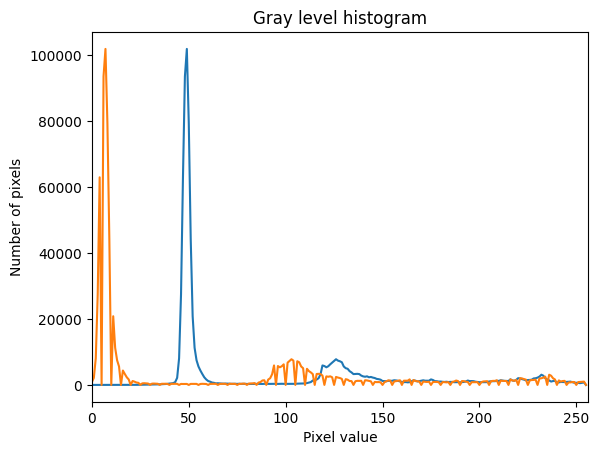

1.2439024390243902 -53.48780487804878


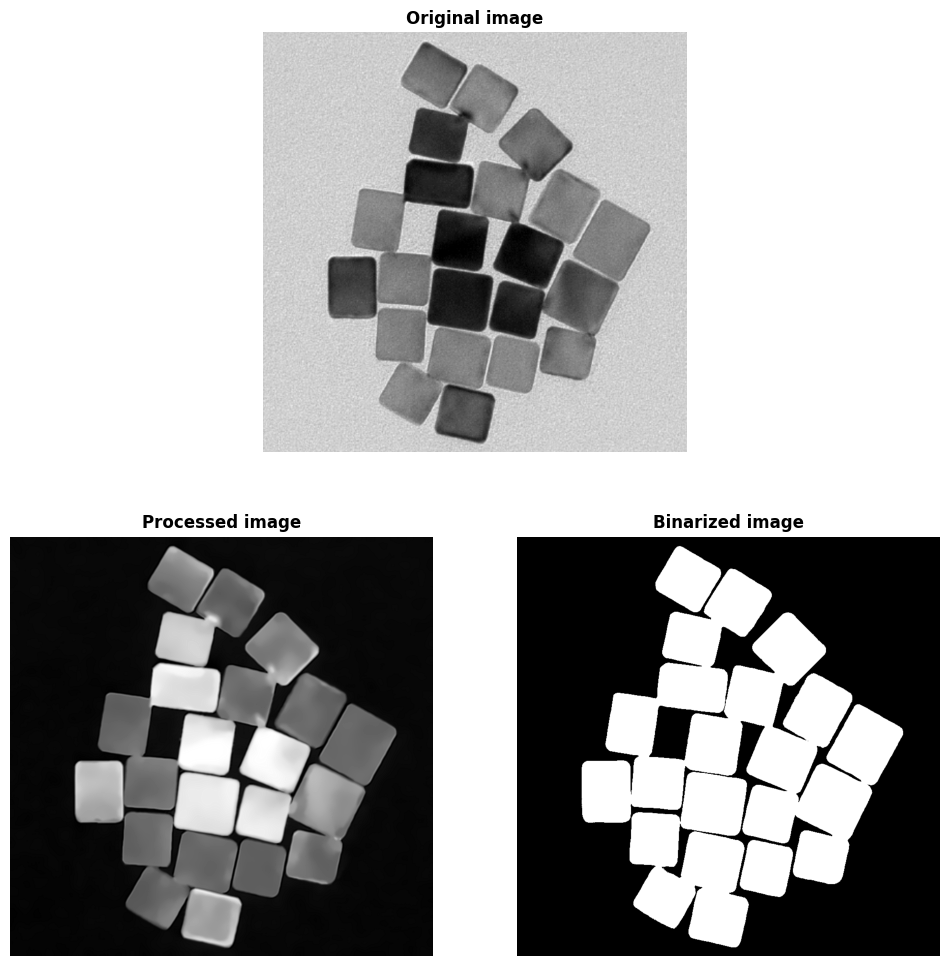

In [99]:
img = cv2.imread("nano_cube_internet.png")
# img_treat,alpha,beta = image_treatment_manuel ("nano_cube_internet.jpg", inverse_color = True,
#                                         kernel_morpho = 3,
#                                         open_iter=1,
#                                         close_iter=3,
#                                         clear_bder = False,
#                                         alpha = 1.6,
#                                         beta = -10)

img_treat,alpha,beta = image_treatment ("nano_cube_internet.png", inverse_color = True,
                                        kernel_morpho = 3,
                                        open_iter=0,
                                        close_iter=0,
                                        clear_bder = True,
                                          )
print(alpha,beta)

## Watershed the image

#### ** Verify the segmentation by looking at the extracted sure foreground

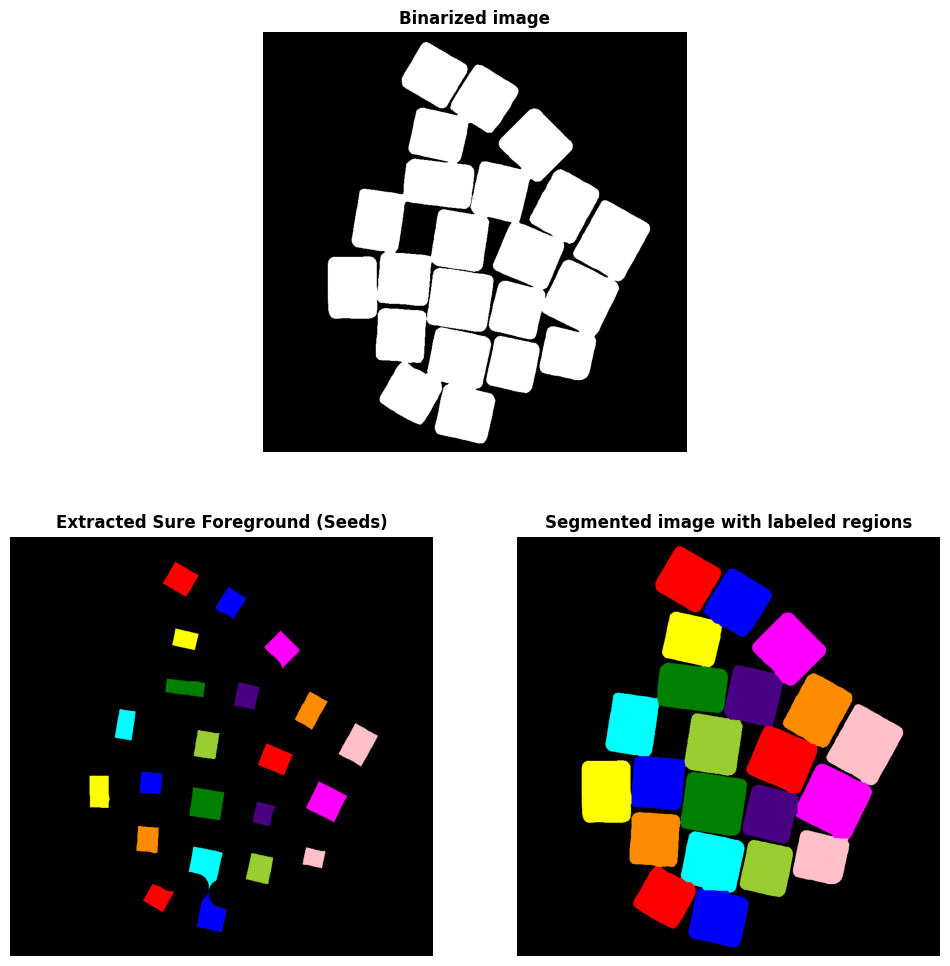

In [66]:
labels_ws = NP_segmentation_fg_bg(img_treat, dist_max_threshold = 0.5,erode_iter=1,open_iter=1,kernel_size = 3)

## Load the wanted model

In [102]:
model = tf.keras.models.load_model('C:/Users/ACER/OneDrive/Desktop/4eme/projet_multi/models/model_functional_data2_128x128.h5')

### **** The warning doesn't matter much in this example but in some case the model could be totally refreshed

## Classify the label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[1.10029956e-04 9.99889970e-01 6.33887257e-12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[6.7468338e-02 9.3253165e-01 1.2970991e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.5158193e-09 1.0000000e+00 1.1988727e-14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.9352470e-03 9.9806458e-01 1.3803762e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[9.223321e-11 1.000000e+00 5.435369e-13]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[7.504061e-07 9.999993e-01 9.810978e-11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[7.060937e-04 9.992939e-01 1.867760e-08]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[2.1724763e-05 9.9997795e-01 2.8658178e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[3.2430410e-04 9.9967551e-01 1.7415414e-07]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[5.0043667e-09 1.0000000e+00 2.1254227e-12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[3.8834933e-08 1.0000000e+00 6.0345899e-16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[6.0316665e-08 9.9999976e-01 1.5118556e-07]

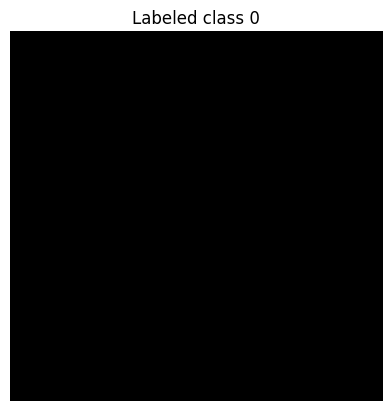

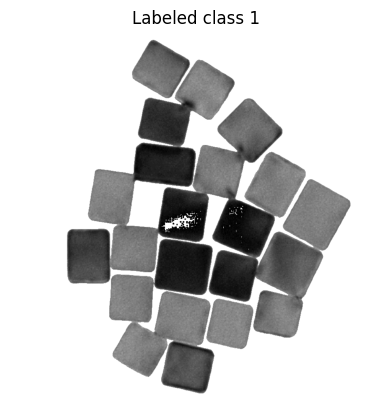

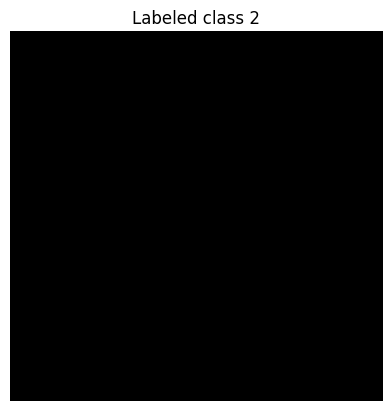

In [67]:
extracted_labels = Classification(img,model,3,labels_ws,target_size=(128,128),color_mode='RGB',black_bg_color = False)

## Scale bar ratio

#### * Random scale bar image in this example

<Figure size 640x480 with 0 Axes>

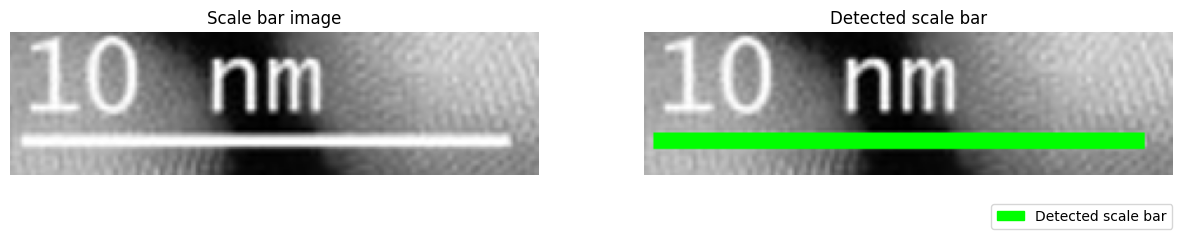

In [69]:
pixel_to_nm = detect_scale_bar("bar4.png",10)

## Plot the class size histogram and Gaussian fit

#### * The Gaussiant fit won't work in this example because the number of sample frequency is too big

1
<r> =2.9677868102793497+-0.026610990417761226 nm 


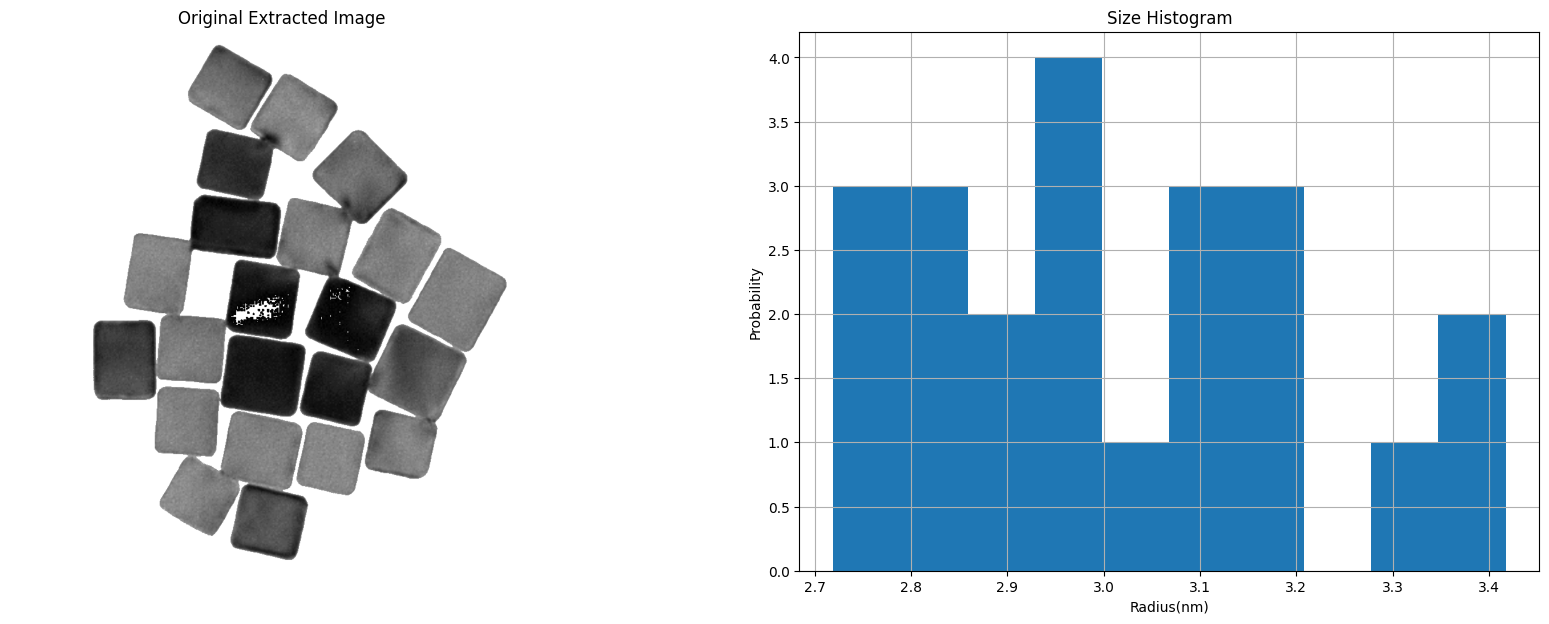

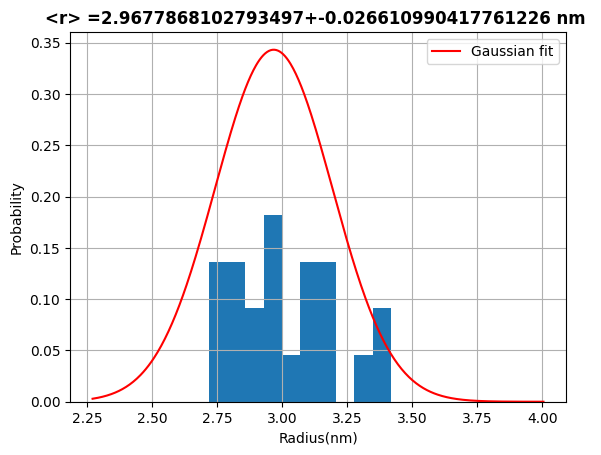

In [112]:
# i = Selected class to extract its label
i = 1 # 1 for square
square = extracted_labels[i]
# pixel_to_nm extracted
square_size = size_histogram(square, pixel_to_nm=pixel_to_nm, name_img="nano_cube_internet.png",bins = 10)
plot_Gaussian_fit(square_size,bins=10)

## Xplique

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[[6.7468338e-02 9.3253165e-01 1.2970991e-08]]


<Figure size 640x480 with 0 Axes>

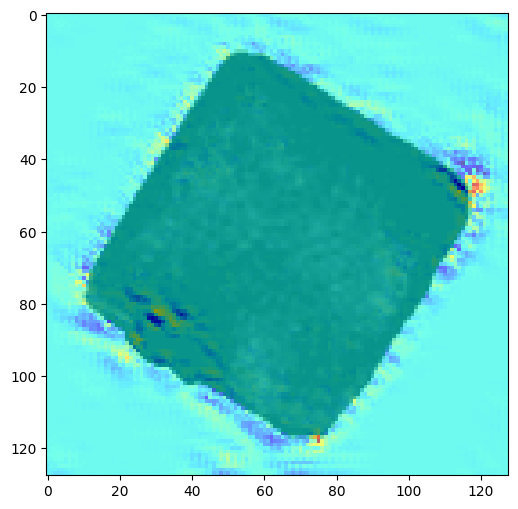

<Figure size 640x480 with 0 Axes>

In [106]:
# extract object labeled by 4
ext = extract_np(2,img, labels_ws,black_bg_color = False)
r,ext = testing_image(ext,model,target_size=(128,128),color_mode = 'RGB')
show_xplique(model,ext,0,3,0.6,GradientInput)